In [12]:
# se importan las librerías de Python necesarias
import numpy as np
import matplotlib.pyplot as plt
import control as syc

# EJERCICIO 1

<img src="grilla_datos.png">

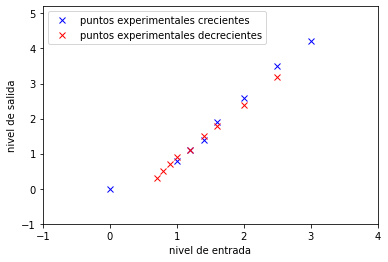

El termino lineal es a_1 = 1.5476037929267044 y el independieste es a_0 = -0.6165043567401339
El término lineal de la linealización por cero es c = 1.2105379188712522


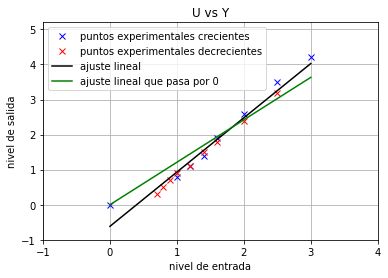

Usando solo valores crecientes
El termino lineal es a_1 = 1.4984500929944198 y el independieste es a_0 = -0.4412895226286423
El término lineal de la linealización por cero es c = 1.2846241892407477
 
Se grafican los puntos y su linealización en forma creciente:


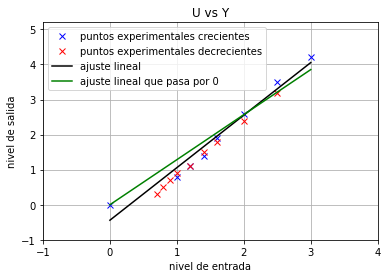

Usando solo valores decrecientes
El termino lineal es a_1 = 1.5851966075558985 y el independieste es a_0 = -0.75343099460293
El término lineal de la linealización por cero es c = 1.1091383812010445
 
Se grafican los puntos y su linealización en forma decreciente:


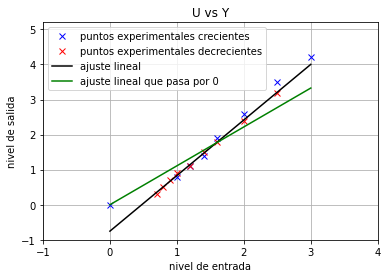

In [13]:
# se ponen los datos de entrada y salida en arreglos

U = np.array([0.0, 1.0, 1.2, 1.4, 1.6, 2.0, 2.5, 3.0, 2.5, 2.0, 
              1.6, 1.4, 1.2, 1.0, 0.9, 0.8, 0.7])

Y = np.array([0.0, 0.8, 1.1, 1.4, 1.9, 2.6, 3.5, 4.2, 3.2, 2.4, 
              1.8, 1.5, 1.1, 0.9, 0.7, 0.5, 0.3])

# hallo los maximos y minimos de la entrada y salida
U_max = np.max(U)
Y_max = np.max(Y)

U_min = np.min(U)
Y_min = np.min(Y)

# grafico los datos
U_crec = U[:8]
Y_crec = Y[:8]

U_dec = U[8:]
Y_dec = Y[8:]

plt.plot(U_crec, Y_crec, 'bx',label='puntos experimentales crecientes')
plt.plot(U_dec, Y_dec, 'rx',label='puntos experimentales decrecientes')
plt.axis([U_min-1, U_max+1, Y_min-1, Y_max+1])
plt.xlabel('nivel de entrada')
plt.ylabel('nivel de salida')
plt.legend()
plt.show()

def min_cuad(U,Y):
    # hago el ajuste a polinomio de 1er grado (Y=coef_mc[0]*U + coef_mc[1])
    coef_mc = np.polyfit(U, Y ,1)
    print('El termino lineal es a_1 =',coef_mc[0], 'y el independieste es a_0 =',coef_mc[1])

    coef_lin = np.sum(Y*U)/np.sum(U**2)
    print('El término lineal de la linealización por cero es c =',coef_lin)
    
    return(coef_mc,coef_lin)

def graficar_linealizacion(U_crec, Y_crec,U_dec, Y_dec, U_lin,Y_lin, U_0, Y_0):
    U_max_c = np.max(U_crec)
    U_max_d = np.max(U_dec)
    U_max = np.max([U_max_d,U_max_c])
    Y_max_c = np.max(Y_crec)
    Y_max_d = np.max(Y_dec)
    Y_max = np.max([Y_max_d,Y_max_c])
    
    plt.plot(U_crec, Y_crec, 'bx',label='puntos experimentales crecientes')
    plt.plot(U_dec, Y_dec, 'rx',label='puntos experimentales decrecientes')
    plt.plot(U_lin, Y_lin, 'k', label='ajuste lineal')
    plt.plot(U_0, Y_0, 'g', label='ajuste lineal que pasa por 0')

    plt.title('U vs Y')
    plt.axis([U_min-1, U_max+1, Y_min-1, Y_max+1])
    plt.xlabel('nivel de entrada')
    plt.ylabel('nivel de salida')
    plt.grid()
    plt.legend()
    plt.show()
    
    # calculo los coeficientes de la linealización
mse,c = min_cuad (U,Y)

# creo variable para las linealizaciones
u = np.arange(0, 4, 1)

y_mc = u*mse[0] + mse[1]     #polinomio que no pasa por 0

y_mc_0 = u*c                  #polinomio que pasa por 0

graficar_linealizacion(U_crec,Y_crec,U_dec,Y_dec, u, y_mc, u, y_mc_0)

print('Usando solo valores crecientes')
# repito para los valores crecientes

# calculo los coeficientes de la linealización
mse_crec,c_crec = min_cuad (U_crec,Y_crec)

# creo variable para las linealizaciones
u_crec = np.arange(0, 4, 1)

y_mc_crec = u*mse_crec[0] + mse_crec[1]     #polinomio que no pasa por 0

y_mc_0_crec = u*c_crec                  #polinomio que pasa por 0

print(' ')
print('Se grafican los puntos y su linealización en forma creciente:')

graficar_linealizacion(U_crec, Y_crec, U_dec, Y_dec, u_crec, y_mc_crec, u_crec, y_mc_0_crec)

print('Usando solo valores decrecientes')

# calculo los coeficientes de la linealización
mse_dec,c_dec = min_cuad (U_dec,Y_dec)

# creo variable para las linealizaciones
u_dec = np.arange(0, 4, 1)

y_mc_dec = u*mse_dec[0] + mse_dec[1]     #polinomio que no pasa por 0

y_mc_0_dec = u*c_dec                  #polinomio que pasa por 0

print(' ')
print('Se grafican los puntos y su linealización en forma decreciente:')

graficar_linealizacion(U_crec, Y_crec, U_dec, Y_dec, u_dec, y_mc_dec, u_dec, y_mc_0_dec)


# EJERCICIO 2

Los polos de la transferencia son: [-500.   -1.]


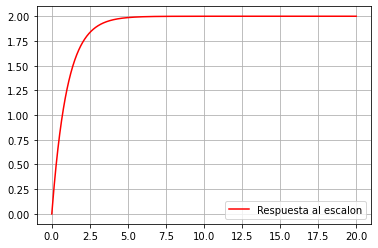

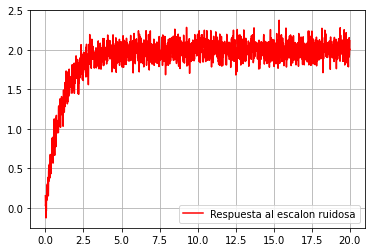

El promedio de la ganancia en régimen es A = 2.0018924772214155
El valor de la constante de tiempo es T = 1.0220557548731173


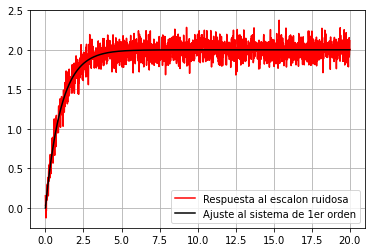

In [14]:
#Defino la transferencia
H = syc.tf([1000],[1, 501, 500])
H

print('Los polos de la transferencia son:', np.roots([1, 501, 500]))

time = np.arange(0,20,0.01)
time, y_h = syc.step_response(sys=H, T=time)


plt.plot(time,y_h, 'r',label='Respuesta al escalon')
#plt.title('Respuesta al impulso')
plt.grid()
plt.legend()
plt.show()

np.random.seed(14)                                 ## fijo la aletoriedad del ruido
ruido = np.random.normal(0, 0.1, size=time.shape)  ## sigma^2 = 0.01

resp_ruidosa = y_h+ruido

plt.plot(time,resp_ruidosa, 'r',label='Respuesta al escalon ruidosa')
#plt.title('Respuesta al impulso')
plt.grid()
plt.legend()
plt.show()

A = np.mean(resp_ruidosa[1000:])

print('El promedio de la ganancia en régimen es A =',A)

posiciones = np.where(resp_ruidosa>=A)

arg_A_max = np.min(posiciones)

cv = np.log(1-resp_ruidosa[:arg_A_max]/A)

T = -np.sum(time[:arg_A_max])/np.sum(cv)

print('El valor de la constante de tiempo es T =',T)

y_ajust = A*(1-np.exp(-time/T))

plt.plot(time,resp_ruidosa, 'r',label='Respuesta al escalon ruidosa')
plt.plot(time,y_ajust, 'k',label='Ajuste al sistema de 1er orden')
plt.grid()
plt.legend()
plt.show()


# Archivo con análisis de curva estática

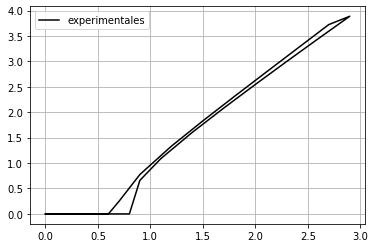

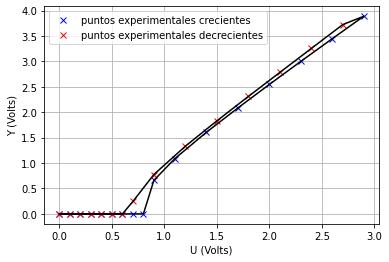

Tomando todos los datos
El termino lineal es a_1 = 1.5074416429601334 y el independieste es a_0 = -0.516633490510892
El término lineal de la linealización por cero es c = 1.215397698849425


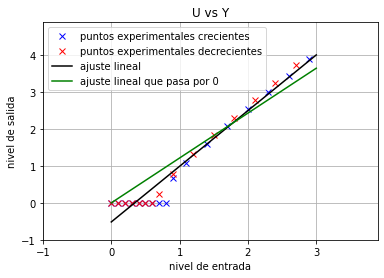

Tomando lso datos que no se encuentran en zona muerta
El termino lineal es a_1 = 1.6341339255210114 y el independieste es a_0 = -0.7195360437307815
El término lineal de la linealización por cero es c = 1.278277797264118


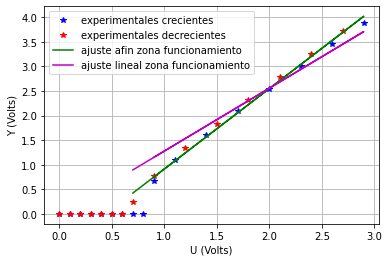

El error cuadrático en la relación afin es de: 0.10296994875298947
El error cuadrático en la relación lineal es de: 1.1660368796913358
Para los datos crecientes
El termino lineal es a_1 = 1.590747467691233 y el independieste es a_0 = -0.6731421585749211
El término lineal de la linealización por cero es c = 1.27061283115225
 
Para los datos decrecientes
El termino lineal es a_1 = 1.7409117361784674 y el independieste es a_0 = -0.8828525703200771
El término lineal de la linealización por cero es c = 1.269831094049904


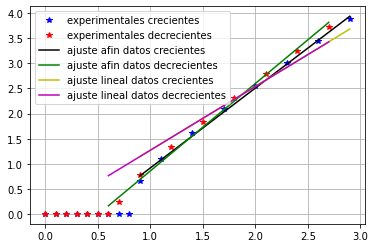

In [15]:
# Defino funciones necesarias

def error_cuad(U,Y,a_afin,b_afin,c_lin):
    # función que calcula el error cuadrático tanto para la relación afín como lineal
    # U e Y son los vectores con los datos (misma dimensión)
    # a_afin y b_afin son la pendiente y término independiente en la relación afín
    # c_lin es la pendiente en la relación lineal
    
    error_afin = np.sum((a_afin*U+b_afin-Y)**2)
    error_lin  = np.sum((c_lin*U-Y)**2)
    
    return (error_afin,error_lin)

def min_cuad(U,Y):
    # hago el ajuste a polinomio de 1er grado (Y=coef_mc[0]*U + coef_mc[1])
    coef_mc = np.polyfit(U, Y ,1)
    print('El termino lineal es a_1 =',coef_mc[0], 'y el independieste es a_0 =',coef_mc[1])

    coef_lin = np.sum(Y*U)/np.sum(U**2)
    print('El término lineal de la linealización por cero es c =',coef_lin)
    
    return(coef_mc,coef_lin)

def graficar_linealizacion(U_crec, Y_crec,U_dec, Y_dec, U_lin,Y_lin, U_0, Y_0):
    U_max_c = np.max(U_crec)
    U_max_d = np.max(U_dec)
    U_max = np.max([U_max_d,U_max_c])
    Y_max_c = np.max(Y_crec)
    Y_max_d = np.max(Y_dec)
    Y_max = np.max([Y_max_d,Y_max_c])
    
    plt.plot(U_crec, Y_crec, 'bx',label='puntos experimentales crecientes')
    plt.plot(U_dec, Y_dec, 'rx',label='puntos experimentales decrecientes')
    plt.plot(U_lin, Y_lin, 'k', label='ajuste lineal')
    plt.plot(U_0, Y_0, 'g', label='ajuste lineal que pasa por 0')

    plt.title('U vs Y')
    plt.axis([U_min-1, U_max+1, Y_min-1, Y_max+1])
    plt.xlabel('nivel de entrada')
    plt.ylabel('nivel de salida')
    plt.grid()
    plt.legend()
    plt.show()
    
# Importo los datos de la curva estática

data_stc = np.loadtxt("planta_5_resp_estatica.csv", delimiter=" ")

u_stc = data_stc[:,0]
y_stc = data_stc [:,1]

plt.plot(u_stc,y_stc, 'k',label='experimentales')
plt.legend()
plt.grid()
plt.show()

pos = np.where(y_stc==np.max(y_stc))[0][0]

u_stc_c = u_stc[0:pos+1]
u_stc_d = u_stc[pos+1:]
y_stc_c = y_stc[0:pos+1]
y_stc_d = y_stc[pos+1:]

plt.plot(u_stc_c, y_stc_c, 'bx',label='puntos experimentales crecientes')
plt.plot(u_stc_d, y_stc_d, 'rx',label='puntos experimentales decrecientes')
plt.xlabel('U (Volts)')
plt.ylabel('Y (Volts)')
plt.plot(u_stc,y_stc, 'k')
plt.legend()
plt.grid()
plt.show()

# calculo los coeficientes de la linealización

print('Tomando todos los datos')
mse,c = min_cuad (u_stc,y_stc)

# creo variable para las linealizaciones
u = np.arange(0, 4, 1)

y_mc = u*mse[0] + mse[1]     #polinomio que no pasa por 0

y_mc_0 = u*c                  #polinomio que pasa por 0

graficar_linealizacion(u_stc_c,y_stc_c,u_stc_d,y_stc_d, u, y_mc, u, y_mc_0)

u_viva = u_stc[9:25]
y_viva = y_stc[9:25]

print('Tomando lso datos que no se encuentran en zona muerta')
mse_v,C_v = min_cuad (u_viva,y_viva)

plt.plot(u_stc_c,y_stc_c, 'b*',label='experimentales crecientes')
plt.plot(u_stc_d,y_stc_d, 'r*',label='experimentales decrecientes')

plt.plot(u_viva,u_viva*mse_v[0]+mse_v[1], 'g',label='ajuste afin zona funcionamiento')
plt.plot(u_viva,u_viva*C_v, 'm',label='ajuste lineal zona funcionamiento')
plt.xlabel('U (Volts)')
plt.ylabel('Y (Volts)')
plt.legend()
plt.grid()
plt.show()

a_1=1.6341339255210114
a_0 = -0.7195360437307815
c = 1.278277797264118
error_afin, error_lin = error_cuad(u_viva, y_viva, a_1, a_0, c)
print('El error cuadrático en la relación afin es de:', error_afin)
print('El error cuadrático en la relación lineal es de:', error_lin)

u_lin_c = u_stc_c[9:]
u_lin_d = u_stc_d[:9]
y_lin_c = y_stc_c[9:]
y_lin_d = y_stc_d[:9]
print('Para los datos crecientes')
mse_c,C_c = min_cuad (u_lin_c,y_lin_c)
print(' ')
print('Para los datos decrecientes')
mse_d,C_d = min_cuad (u_lin_d,y_lin_d)

plt.plot(u_stc_c,y_stc_c, 'b*',label='experimentales crecientes')
plt.plot(u_stc_d,y_stc_d, 'r*',label='experimentales decrecientes')

plt.plot(u_lin_c,u_lin_c*mse_c[0]+mse_c[1], 'k',label='ajuste afin datos crecientes')
plt.plot(u_lin_d,u_lin_d*mse_d[0]+mse_d[1], 'g',label='ajuste afin datos decrecientes')

plt.plot(u_lin_c,u_lin_c*C_c, 'y',label='ajuste lineal datos crecientes')
plt.plot(u_lin_d,u_lin_d*C_d, 'm',label='ajuste lineal datos decrecientes')

plt.legend()
plt.grid()
plt.show()

# Archivo con análisis respuesta al escalón

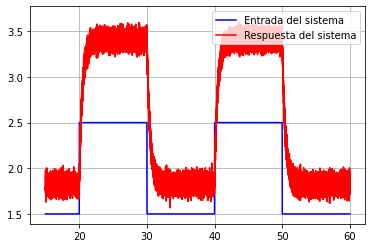

el periodo de la señal de entrada es de 20 segundos
El periodo de muestreo es: 0.0009999999999994458 segundos
El offset1 es 1.8233149370125976
El offset2 es 1.8247684000000002
El offset3 es 1.825922
La ganancia en regimen 1 es 1.5857106629874025
La ganancia en regimen 2 es 1.5828844000000004
Estimacion de la ganancia A= 1.5842975314937013
El valor de la constante de tiempo es T = 0.4458494830641393


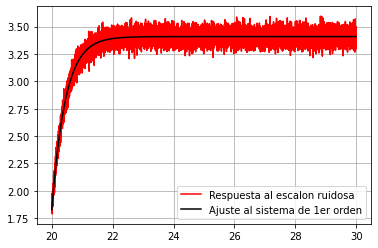

El valor de la constante de tiempo es T = 0.4543679925745196


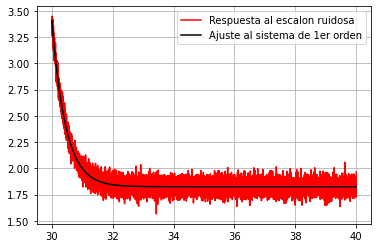

El valor de la constante de tiempo es T = 0.44411119518332576


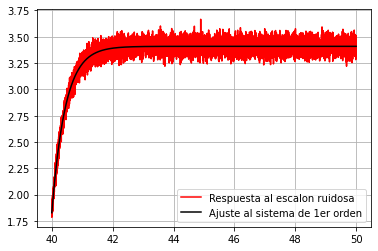

El valor de la constante de tiempo es T = 0.4561157451929039


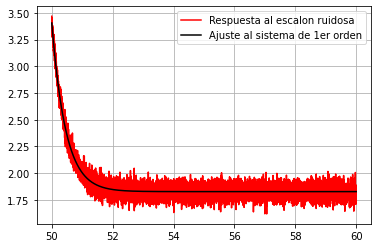

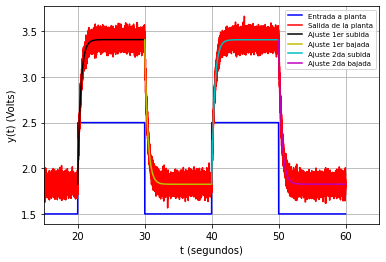

Se estima el tiempo de subida como T_subida = 0.4449803391237325 segundos
Se estima el tiempo de bajada como T_bajada = 0.45524186888371176 segundos


In [16]:
# Se importan los datos dados por los docentes de respuesta al escalón de la planta

data_escalon = np.loadtxt("planta_5_resp_escalon.csv", delimiter=" ")
t_esc = data_escalon[:,0]
N = t_esc.shape[0]
u_esc = data_escalon[:,1]
y_esc = data_escalon[:,2]

plt.plot(t_esc,u_esc, 'b',label='Entrada del sistema')
plt.plot(t_esc,y_esc, 'r',label='Respuesta del sistema')
plt.grid()
plt.legend()
plt.show()


to = t_esc[0]
n_1er_subida = 5001
n_1er_bajada = 15001
n_int1       = 10001
n_2da_subida = 25001
n_int2       = 20001
n_2da_bajada = 35001
n_int3       = 30001
n_final      = t_esc.shape[0]
n_int4       = 40001

t_1er_tramo = t_esc[:n_1er_subida]
t_2do_tramo = t_esc[n_1er_subida:n_1er_bajada]
t_3er_tramo = t_esc[n_1er_bajada:n_2da_subida]
t_4to_tramo = t_esc[n_2da_subida:n_2da_bajada]
t_5to_tramo = t_esc[n_2da_bajada:]
y_zona1 = y_esc[n_1er_subida:n_1er_bajada]
y_zona2 = y_esc[n_1er_bajada:n_2da_subida]
y_zona3 = y_esc[n_2da_subida:n_2da_bajada]
y_zona4 = y_esc[n_2da_bajada:]

Offset1 = np.mean(y_esc[:n_1er_subida])

A_regimen1 = np.mean(y_esc[n_int1:n_1er_bajada]) - Offset1
Offset2 = np.mean(y_esc[n_int2:n_2da_subida])
A_regimen2 = np.mean(y_esc[n_int3:n_2da_bajada]) - Offset2
Offset3 = np.mean(y_esc[n_int4:])

print('el periodo de la señal de entrada es de 20 segundos')
print('El periodo de muestreo es:',(t_esc[1]-to), 'segundos')

print('El offset1 es',Offset1)
print('El offset2 es',Offset2)
print('El offset3 es',Offset3)
print('La ganancia en regimen 1 es',A_regimen1)
print('La ganancia en regimen 2 es',A_regimen2)
A_g = np.mean([A_regimen1,A_regimen2])
print('Estimacion de la ganancia A=',A_g)

posiciones1 = np.where(y_zona1>=A_regimen1+Offset1)
t_aux2     = t_2do_tramo - 20
arg_A_max  = np.min(posiciones1)

cv_zona1 = np.log(1-(y_zona1[:arg_A_max]-Offset1)/A_regimen1)

T_1ersub = -np.sum(t_aux2[:arg_A_max])/np.sum(cv_zona1)

print('El valor de la constante de tiempo es T =',T_1ersub)

y_ajust = A_regimen1*(1-np.exp(-t_aux2/T_1ersub)) + Offset1

plt.plot(t_2do_tramo,y_zona1, 'r',label='Respuesta al escalon ruidosa')
plt.plot(t_2do_tramo,y_ajust, 'k',label='Ajuste al sistema de 1er orden')
plt.grid()
plt.legend()
plt.show()

posiciones2 = np.where(y_zona2<=Offset2)
arg_min     = np.min(posiciones2)
t_aux3      = t_3er_tramo - 30
cv_z2         = np.log((y_zona2[:arg_min]-Offset2)/A_regimen1)
T_1erbaj    = -np.sum(t_aux3[:arg_min])/np.sum(cv_z2)
y_ajust_baj = A_regimen1*np.exp(-t_aux3/T_1erbaj) + Offset2

print('El valor de la constante de tiempo es T =',T_1erbaj)

plt.plot(t_3er_tramo,y_zona2, 'r',label='Respuesta al escalon ruidosa')
plt.plot(t_3er_tramo,y_ajust_baj, 'k',label='Ajuste al sistema de 1er orden')
plt.grid()
plt.legend()
plt.show()

posiciones3 = np.where(y_zona3>=A_regimen2+Offset2)
t_aux4     = t_4to_tramo - 40
argmax  = np.min(posiciones3)

cv_zona3 = np.log(1-(y_zona1[:argmax]-Offset2)/A_regimen2)

T_2dasub = -np.sum(t_aux4[:argmax])/np.sum(cv_zona3)

print('El valor de la constante de tiempo es T =',T_2dasub)

y_ajust3 = A_regimen2*(1-np.exp(-t_aux4/T_2dasub)) + Offset2

plt.plot(t_4to_tramo,y_zona3, 'r',label='Respuesta al escalon ruidosa')
plt.plot(t_4to_tramo,y_ajust3, 'k',label='Ajuste al sistema de 1er orden')
plt.grid()
plt.legend()
plt.show()

posiciones4 = np.where(y_zona4<=Offset3)
argmin     = np.min(posiciones4)
t_aux4      = t_5to_tramo - 50
cv_z4         = np.log((y_zona4[:argmin]-Offset3)/A_regimen2)
T_2dabaj    = -np.sum(t_aux4[:argmin])/np.sum(cv_z4)
y_ajust4 = A_regimen2*np.exp(-t_aux4/T_2dabaj) + Offset3

print('El valor de la constante de tiempo es T =',T_2dabaj)

plt.plot(t_5to_tramo,y_zona4, 'r',label='Respuesta al escalon ruidosa')
plt.plot(t_5to_tramo,y_ajust4, 'k',label='Ajuste al sistema de 1er orden')
plt.grid()
plt.legend()
plt.show()

plt.plot(t_esc,u_esc, 'b',label='Entrada a planta')
plt.plot(t_esc,y_esc, 'r',label='Salida de la planta')

plt.plot(t_2do_tramo,y_ajust, 'k',label='Ajuste 1er subida')
plt.plot(t_3er_tramo,y_ajust_baj, 'y',label='Ajuste 1er bajada')
plt.plot(t_4to_tramo,y_ajust3, 'c',label='Ajuste 2da subida')
plt.plot(t_5to_tramo,y_ajust4, 'm',label='Ajuste 2da bajada')
plt.grid()
axes = plt.gca()
axes.set_xlim([15,65])
plt.xlabel('t (segundos)')
plt.ylabel('y(t) (Volts)')
plt.legend(fontsize=7,loc='upper right')
plt.show()

print('Se estima el tiempo de subida como T_subida =',np.mean([T_1ersub,T_2dasub]),'segundos')
print('Se estima el tiempo de bajada como T_bajada =',np.mean([T_1erbaj,T_2dabaj]),'segundos')

# Archivo con lugar de las raíces con controlador integrador

Se grafica el lugar de las raíces para un controlador integrador


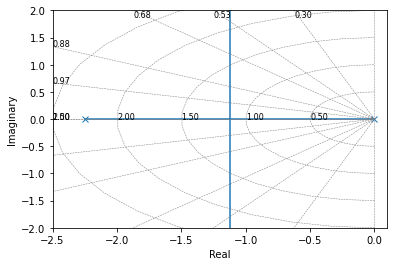

In [17]:
T_subida = 0.4448
H = syc.tf([1.58],[(T_subida),1])
print('Se grafica el lugar de las raíces para un controlador integrador')
I = syc.tf([1],[1,0])
H_I = I*H
rlocus_int = syc.rlocus(sys=H_I,xlim=(-2.5,0.1),ylim=(-2,2))
